In [1]:
import numpy as np
import os
import tensorflow as tf
import tqdm
from sklearn.model_selection import train_test_split
from tensorflow import keras

In [2]:
# take data
data_dir='data'

In [4]:
no_of_videos=75
no_of_frames=30

In [6]:
actions=os.listdir(data_dir)
actions

['blank', 'hello', 'how are you', 'thank you']

In [7]:
action_map={action:num for num,action in enumerate(actions)}

In [8]:
action_map

{'blank': 0, 'hello': 1, 'how are you': 2, 'thank you': 3}

In [18]:
x_data=[]
y_data=[]
for action in tqdm.tqdm(actions):
    index=action_map[action]
    for video in range(no_of_videos):
        window=[]
        for frame in range(no_of_frames):
            path=os.path.join(data_dir,action,str(video),f'{frame}.npy')
            res=np.load(path)
            window.append(res)
        x_data.append(window)
        y_data.append(index)
        
    
            

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [04:03<00:00, 60.89s/it]


In [17]:
len(window)

30

In [21]:
len(y_data),4*75

(300, 300)

In [22]:
x=np.array(x_data)

In [26]:
y=keras.utils.to_categorical(np.array(y_data)).astype(int)

In [30]:
y

array([[1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       ...,
       [0, 0, 0, 1],
       [0, 0, 0, 1],
       [0, 0, 0, 1]])

In [31]:
# create model

In [35]:
model=keras.Sequential()
model.add(keras.layers.LSTM(128,return_sequences=True,activation='relu',input_shape=(30,1662)))
model.add(keras.layers.LSTM(64,return_sequences=True,activation='relu'))
model.add(keras.layers.LSTM(32,return_sequences=False,activation='relu'))
model.add(keras.layers.Dense(64,activation='relu'))
model.add(keras.layers.Dense(32,activation='relu'))
model.add(keras.layers.Dense(4,activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['categorical_accuracy'])

In [36]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 30, 128)           916992    
                                                                 
 lstm_1 (LSTM)               (None, 30, 64)            49408     
                                                                 
 lstm_2 (LSTM)               (None, 32)                12416     
                                                                 
 dense (Dense)               (None, 64)                2112      
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 4)                 132       
                                                                 
Total params: 983140 (3.75 MB)
Trainable params: 983140 

In [42]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.10)

In [44]:
y

array([[1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       ...,
       [0, 0, 0, 1],
       [0, 0, 0, 1],
       [0, 0, 0, 1]])

In [43]:
x_train.shape,y_train.shape

((270, 30, 1662), (270, 4))

In [39]:
history1=model.fit(x_train,y_train,epochs=150,validation_data=(x_test,y_test))

Epoch 1/150
8/8 [==============================] - 13s 393ms/step - loss: 15.1333 - categorical_accuracy: 0.2588 - val_loss: 13.0245 - val_categorical_accuracy: 0.2444
Epoch 2/150
8/8 [==============================] - 2s 248ms/step - loss: 46.6222 - categorical_accuracy: 0.2431 - val_loss: 45.6941 - val_categorical_accuracy: 0.2889
Epoch 3/150
8/8 [==============================] - 2s 223ms/step - loss: 18.6062 - categorical_accuracy: 0.2980 - val_loss: 13.1655 - val_categorical_accuracy: 0.2667
Epoch 4/150
8/8 [==============================] - 2s 227ms/step - loss: 13.3822 - categorical_accuracy: 0.2745 - val_loss: 15.6647 - val_categorical_accuracy: 0.1333
Epoch 5/150
8/8 [==============================] - 2s 224ms/step - loss: 17.9730 - categorical_accuracy: 0.2353 - val_loss: 20.6338 - val_categorical_accuracy: 0.2222
Epoch 6/150
8/8 [==============================] - 2s 230ms/step - loss: 45.7367 - categorical_accuracy: 0.2196 - val_loss: 78.2287 - val_categorical_accuracy: 0.24

In [40]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

In [41]:
model2 = Sequential()
model2.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(30,1662)))
model2.add(LSTM(128, return_sequences=True, activation='relu'))
model2.add(LSTM(64, return_sequences=False, activation='relu'))
model2.add(Dense(64, activation='relu'))
model2.add(Dense(32, activation='relu'))
model2.add(Dense(4, activation='softmax'))
model2.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [45]:
history1=model2.fit(x_train,y_train,epochs=300,validation_data=(x_test,y_test))

Epoch 1/300
9/9 [==============================] - 10s 277ms/step - loss: 8.1760 - categorical_accuracy: 0.2815 - val_loss: 6.0088 - val_categorical_accuracy: 0.3000
Epoch 2/300
9/9 [==============================] - 2s 175ms/step - loss: 12.2033 - categorical_accuracy: 0.2815 - val_loss: 5.3860 - val_categorical_accuracy: 0.3333
Epoch 3/300
9/9 [==============================] - 1s 152ms/step - loss: 11.0663 - categorical_accuracy: 0.2481 - val_loss: 10.6892 - val_categorical_accuracy: 0.3667
Epoch 4/300
9/9 [==============================] - 1s 148ms/step - loss: 95.0661 - categorical_accuracy: 0.2185 - val_loss: 68.1287 - val_categorical_accuracy: 0.3000
Epoch 5/300
9/9 [==============================] - 1s 163ms/step - loss: 111.2582 - categorical_accuracy: 0.2148 - val_loss: 88.3288 - val_categorical_accuracy: 0.3333
Epoch 6/300
9/9 [==============================] - 1s 162ms/step - loss: 155.4865 - categorical_accuracy: 0.2704 - val_loss: 141.6132 - val_categorical_accuracy: 0.40

In [46]:
history2=model2.fit(x_train,y_train,epochs=300,validation_data=(x_test,y_test))

Epoch 1/300
9/9 [==============================] - 1s 154ms/step - loss: 0.4421 - categorical_accuracy: 0.8000 - val_loss: 0.6275 - val_categorical_accuracy: 0.7333
Epoch 2/300
9/9 [==============================] - 1s 145ms/step - loss: 0.4569 - categorical_accuracy: 0.7519 - val_loss: 0.7937 - val_categorical_accuracy: 0.6667
Epoch 3/300
9/9 [==============================] - 1s 147ms/step - loss: 0.4262 - categorical_accuracy: 0.8222 - val_loss: 1.2328 - val_categorical_accuracy: 0.5333
Epoch 4/300
9/9 [==============================] - 1s 151ms/step - loss: 0.5346 - categorical_accuracy: 0.7519 - val_loss: 0.9405 - val_categorical_accuracy: 0.6000
Epoch 5/300
9/9 [==============================] - 1s 147ms/step - loss: 0.5571 - categorical_accuracy: 0.7259 - val_loss: 0.8343 - val_categorical_accuracy: 0.6000
Epoch 6/300
9/9 [==============================] - 1s 149ms/step - loss: 0.5635 - categorical_accuracy: 0.6667 - val_loss: 0.9938 - val_categorical_accuracy: 0.5333
Epoch 7/30

KeyboardInterrupt: 

In [50]:
del grumodel

In [51]:
grumodel=keras.Sequential()
grumodel.add(keras.layers.GRU(128,activation='relu',return_sequences=True,input_shape=(30,1662)))
grumodel.add(keras.layers.GRU(64,activation='relu',return_sequences=True))
grumodel.add(keras.layers.GRU(32,activation='relu',return_sequences=False))
grumodel.add(keras.layers.Dense(64,activation='relu'))
grumodel.add(keras.layers.Dense(32,activation='relu'))
grumodel.add(keras.layers.Dense(4,activation='softmax'))
grumodel.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['categorical_accuracy'])

In [52]:
hist=grumodel.fit(x_train,y_train,epochs=600,validation_data=(x_test,y_test))

Epoch 1/600
9/9 [==============================] - 11s 294ms/step - loss: 1.3985 - categorical_accuracy: 0.2593 - val_loss: 1.3860 - val_categorical_accuracy: 0.1667
Epoch 2/600
9/9 [==============================] - 2s 177ms/step - loss: 1.2938 - categorical_accuracy: 0.3667 - val_loss: 1.2430 - val_categorical_accuracy: 0.3667
Epoch 3/600
9/9 [==============================] - 1s 165ms/step - loss: 1.0801 - categorical_accuracy: 0.4741 - val_loss: 1.2113 - val_categorical_accuracy: 0.3000
Epoch 4/600
9/9 [==============================] - 1s 163ms/step - loss: 0.8400 - categorical_accuracy: 0.5630 - val_loss: 0.8819 - val_categorical_accuracy: 0.6667
Epoch 5/600
9/9 [==============================] - 2s 171ms/step - loss: 0.6605 - categorical_accuracy: 0.6630 - val_loss: 0.6273 - val_categorical_accuracy: 0.6000
Epoch 6/600
9/9 [==============================] - 1s 163ms/step - loss: 0.4909 - categorical_accuracy: 0.7889 - val_loss: 0.7378 - val_categorical_accuracy: 0.5667
Epoch 7/6

KeyboardInterrupt: 

In [53]:
grumodel.evaluate(x_test,y_test)

1/1 [==============================] - 0s 83ms/step - loss: 0.0096 - categorical_accuracy: 1.0000


[0.009621324017643929, 1.0]

In [64]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.80)

In [65]:
grumodel.evaluate(x_test,y_test)

8/8 [==============================] - 1s 58ms/step - loss: 0.0352 - categorical_accuracy: 0.9792


[0.03521601855754852, 0.9791666865348816]

In [66]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.5)
grumodel.evaluate(x_test,y_test)

5/5 [==============================] - 0s 57ms/step - loss: 0.0229 - categorical_accuracy: 0.9933


[0.022894391790032387, 0.9933333396911621]

In [67]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.)
grumodel.evaluate(x_test,y_test)

1/1 [==============================] - 0s 76ms/step - loss: 0.0036 - categorical_accuracy: 1.0000


[0.0036293850280344486, 1.0]

In [68]:
grumodel.save('gru_isl_model_v1.keras')
grumodel.save('gru_isl_model_v1.h5')

C:\Users\vivek chouhan\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [74]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.9)
grumodel.evaluate(x_test,y_test)

9/9 [==============================] - 1s 60ms/step - loss: 0.0334 - categorical_accuracy: 0.9815


[0.03341037034988403, 0.9814814925193787]

In [81]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20)

In [96]:
actual=[np.argmax(i) for i in y_test]

In [90]:
y_p=grumodel.predict(x_test)

2/2 [==============================] - 0s 70ms/step


In [98]:
predicted=[ np.argmax(i) for i in y_p]

In [99]:
print(predicted)
print()
print(actual)

[3, 0, 2, 2, 3, 1, 1, 1, 1, 0, 0, 2, 1, 2, 3, 3, 3, 1, 1, 2, 1, 3, 1, 1, 1, 2, 2, 0, 3, 2, 1, 0, 1, 2, 1, 0, 1, 1, 3, 3, 1, 0, 1, 0, 3, 3, 2, 2, 1, 2, 2, 1, 3, 3, 1, 1, 0, 2, 2, 3]

[3, 0, 2, 2, 3, 1, 1, 1, 1, 0, 0, 2, 1, 2, 3, 3, 3, 1, 1, 2, 1, 3, 1, 1, 1, 2, 2, 0, 3, 2, 1, 0, 1, 2, 1, 0, 1, 1, 3, 3, 1, 0, 1, 0, 3, 3, 2, 2, 1, 2, 2, 1, 3, 3, 1, 1, 0, 2, 2, 3]


In [100]:
cm=tf.math.confusion_matrix(actual,predicted)

In [89]:
actions[np.argmax(grumodel.predict(np.expand_dims(x_test[0],0)))],actions[np.argmax(y_test[0])]

1/1 [==============================] - 0s 34ms/step


('thank you', 'thank you')

In [80]:
x_test.shape

(270, 30, 1662)

In [101]:
from seaborn import heatmap

<Axes: >

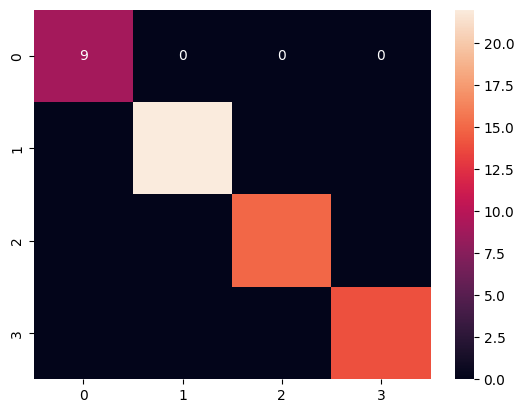

In [102]:
heatmap(cm,annot=True)

In [103]:
from sklearn.metrics import classification_report,multilabel_confusion_matrix

In [104]:
cm=multilabel_confusion_matrix(actual,predicted)

In [105]:
cm

array([[[51,  0],
        [ 0,  9]],

       [[38,  0],
        [ 0, 22]],

       [[45,  0],
        [ 0, 15]],

       [[46,  0],
        [ 0, 14]]], dtype=int64)

In [107]:
from matplotlib import pyplot as plt

blank


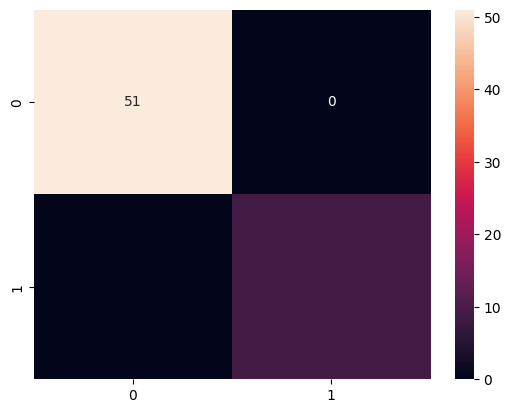

hello


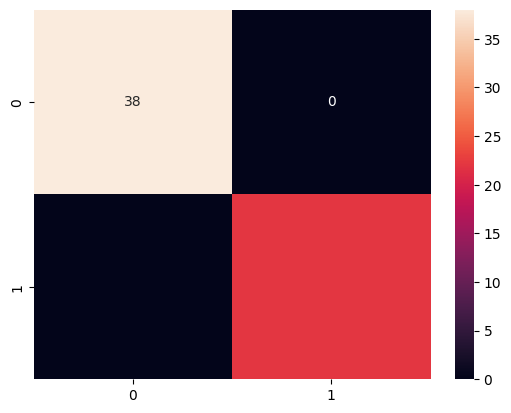

how are you


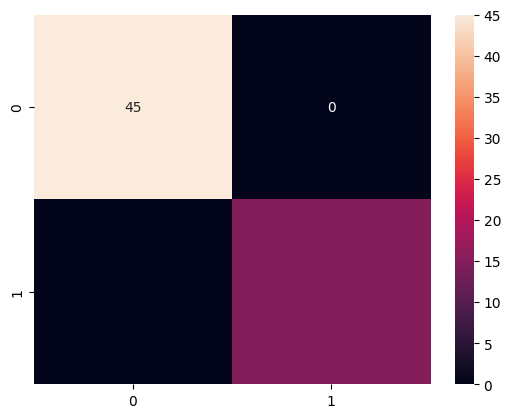

thank you


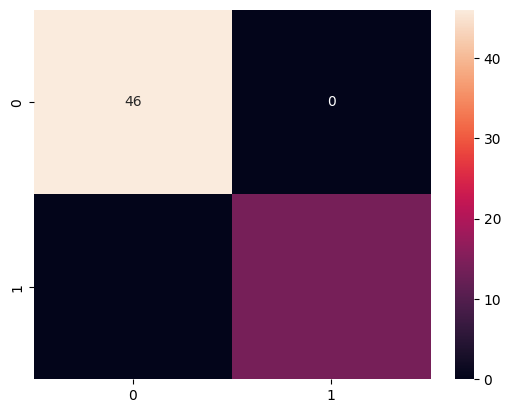

In [108]:
for num,cm_ in enumerate(cm):
    print(actions[num])
    heatmap(cm_,annot=True)
    plt.show()

In [109]:
########################   again trying with lstm #######################

In [110]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.10)

In [111]:
lstmmodel=keras.Sequential()
lstmmodel.add(keras.layers.LSTM(128,activation='relu',return_sequences=True,input_shape=(30,1662)))
lstmmodel.add(keras.layers.LSTM(64,activation='relu',return_sequences=True))
lstmmodel.add(keras.layers.LSTM(32,activation='relu',return_sequences=False))
lstmmodel.add(keras.layers.Dense(64,activation='relu'))
lstmmodel.add(keras.layers.Dense(32,activation='relu'))
lstmmodel.add(keras.layers.Dense(4,activation='softmax'))
lstmmodel.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['categorical_accuracy'])

In [113]:
history1=lstmmodel.fit(x_train,y_train,epochs=600,validation_data=(x_test,y_test))

Epoch 1/600
9/9 [==============================] - 12s 309ms/step - loss: 66.8118 - categorical_accuracy: 0.2963 - val_loss: 71.5619 - val_categorical_accuracy: 0.1667
Epoch 2/600
9/9 [==============================] - 2s 200ms/step - loss: 62.0947 - categorical_accuracy: 0.2111 - val_loss: 24.9000 - val_categorical_accuracy: 0.2000
Epoch 3/600
9/9 [==============================] - 2s 215ms/step - loss: 73.6985 - categorical_accuracy: 0.2481 - val_loss: 66.9673 - val_categorical_accuracy: 0.1333
Epoch 4/600
9/9 [==============================] - 2s 210ms/step - loss: 51.0239 - categorical_accuracy: 0.2444 - val_loss: 25.7097 - val_categorical_accuracy: 0.3000
Epoch 5/600
9/9 [==============================] - 2s 208ms/step - loss: 78.3994 - categorical_accuracy: 0.2296 - val_loss: 38.8943 - val_categorical_accuracy: 0.2667
Epoch 6/600
9/9 [==============================] - 2s 211ms/step - loss: 101.8219 - categorical_accuracy: 0.2333 - val_loss: 78.1000 - val_categorical_accuracy: 0.3

KeyboardInterrupt: 

In [114]:
gru_model2=keras.models.Sequential()
gru_model2.add(keras.layers.GRU(64,activation='relu',return_sequences=True,input_shape=(30,1662)))
gru_model2.add(keras.layers.GRU(128,activation='relu',return_sequences=True))
gru_model2.add(keras.layers.GRU(32,activation='relu',return_sequences=False))
gru_model2.add(keras.layers.Dense(64,activation='relu'))
gru_model2.add(keras.layers.Dense(32,activation='relu'))
gru_model2.add(keras.layers.Dense(4,activation='softmax'))
gru_model2.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['categorical_accuracy'])


history1=gru_model2.fit(x_train,y_train,epochs=300,validation_data=(x_test,y_test))

Epoch 1/300
9/9 [==============================] - 9s 217ms/step - loss: 1.3815 - categorical_accuracy: 0.2778 - val_loss: 1.3591 - val_categorical_accuracy: 0.4667
Epoch 2/300
9/9 [==============================] - 1s 111ms/step - loss: 1.2982 - categorical_accuracy: 0.4037 - val_loss: 1.1727 - val_categorical_accuracy: 0.6333
Epoch 3/300
9/9 [==============================] - 1s 112ms/step - loss: 1.0518 - categorical_accuracy: 0.5519 - val_loss: 0.8018 - val_categorical_accuracy: 0.7667
Epoch 4/300
9/9 [==============================] - 1s 118ms/step - loss: 0.7421 - categorical_accuracy: 0.6519 - val_loss: 0.5780 - val_categorical_accuracy: 0.7333
Epoch 5/300
9/9 [==============================] - 1s 114ms/step - loss: 0.5011 - categorical_accuracy: 0.7296 - val_loss: 0.4240 - val_categorical_accuracy: 0.7000
Epoch 6/300
9/9 [==============================] - 1s 108ms/step - loss: 0.3570 - categorical_accuracy: 0.8333 - val_loss: 0.4927 - val_categorical_accuracy: 0.7333
Epoch 7/30

KeyboardInterrupt: 

In [116]:
gru_model2.evaluate(x_test,y_test)

1/1 [==============================] - 0s 55ms/step - loss: 0.0737 - categorical_accuracy: 1.0000


[0.07366420328617096, 1.0]

In [117]:
import pickle

In [118]:
pickle.dump(actions,open('actions_v1.pickle','wb'))